In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from epiweeks import Year
#import geopandas as gpd
#import geobr

In [2]:
sys.path.append('..')

In [3]:
res_path = '../Data/analyzed/res_epi_curve_351630.csv'
not_path = '../Data/analyzed/not_epi_curve_351630.csv'

df_res = pd.read_csv(res_path)
df_not = pd.read_csv(not_path)

In [4]:
years = (df_res['DATA_EPI'].astype(str).str[:4]).unique()
years_int = [eval(i) for i in years]

year_week_epi = []
for year in years_int:
    nweeks_year = Year(year).totalweeks()
    weeks_year = list(np.arange(1,nweeks_year+1))
    weeks_year = [str(x) for x in weeks_year]
    weeks_year = ['0'+x if len(x) == 1 else x for x in weeks_year]
    weeks_year = [str(year)+'-'+x for x in weeks_year]
    year_week_epi.extend(weeks_year)

cases_week_epi = list(np.zeros(len(year_week_epi)))
df_aux = pd.DataFrame({'DATA_EPI': year_week_epi, 'CASO': cases_week_epi})
df_res = df_res.merge(df_aux,how = 'right', on = 'DATA_EPI' )

In [5]:
df_res['CASES_RES'] = df_res['CASO_x']
df_res = df_res.drop(columns = ['Unnamed: 0', 'CASO_x','CASO_y'])
df_res = df_res.fillna(0)

In [6]:
df_res = df_res.merge(df_not, how = 'left', on = 'DATA_EPI')

In [7]:
df_res['CASES_NOT'] = df_res['CASO']
df_res = df_res.drop(columns = ['Unnamed: 0','CASO'])
df_res = df_res.fillna(0)

In [8]:
df_res = df_res[:52]

### Plotting the epidemiological curves

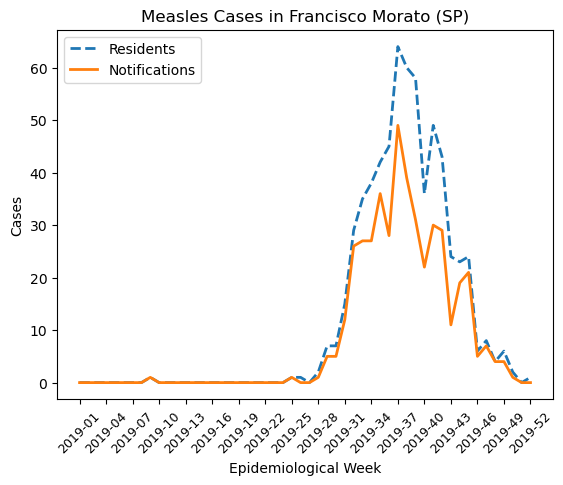

In [9]:
# Plotting 
x = range(len(df_res['DATA_EPI']))
plt.plot(x, df_res['CASES_RES'],'--', label = 'Residents', linewidth = 2)
plt.plot(x, df_res['CASES_NOT'],'-', label = 'Notifications', linewidth = 2)

# Adjusting ticks
x_ticks = np.arange(0,len(x),3)
plt.xticks(x_ticks, df_res['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('Measles Cases in Francisco Morato (SP)')
plt.xlabel('Epidemiological Week')
plt.ylabel('Cases')
plt.legend()
plt.show()

### Plotting over 100k inhabitants

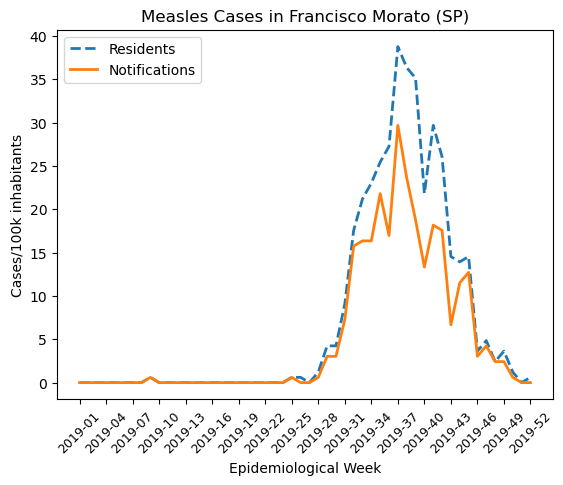

In [10]:
df_res['CASES_RES'] = 100000*(df_res['CASES_RES']/165139)
df_res['CASES_NOT'] = 100000*(df_res['CASES_NOT']/165139)

# Plotting 
x = range(len(df_res['DATA_EPI']))
plt.plot(x, df_res['CASES_RES'],'--', label = 'Residents', linewidth = 2)
plt.plot(x, df_res['CASES_NOT'],'-', label = 'Notifications', linewidth = 2)

# Adjusting ticks
x_ticks = np.arange(0,len(x),3)
plt.xticks(x_ticks, df_res['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('Measles Cases in Francisco Morato (SP)')
plt.xlabel('Epidemiological Week')
plt.ylabel('Cases/100k inhabitants')
plt.legend()
plt.show()

### Comparison with Manacaparu

In [11]:
mp_path = '../Data/analyzed/res_epi_curve_130250.csv'
mp_res = pd.read_csv(mp_path)
mp_res = mp_res.drop(columns = ['Unnamed: 0'])

In [12]:
df_res = df_res.merge(mp_res, how = 'left', on = 'DATA_EPI')

In [13]:
df_res = df_res.fillna(0)

In [14]:
df_res['CASES_RES_MP'] = df_res['CASO']

In [15]:
df_res = df_res.drop(columns = ['CASO'])

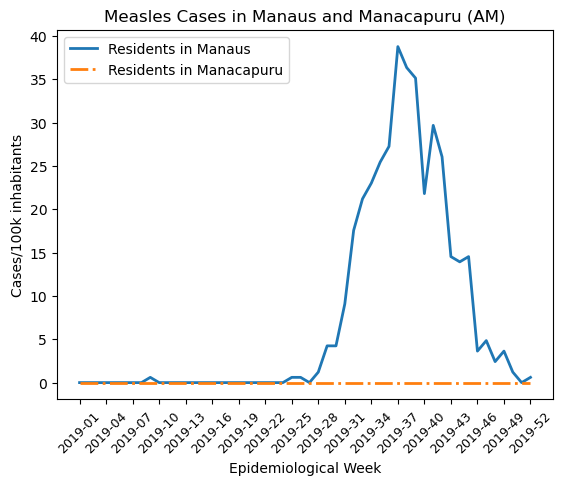

In [16]:
df_res['CASES_RES_MP'] = 100000*(df_res['CASES_RES_MP']/99613)

# Plotting 
x = range(len(df_res['DATA_EPI']))
plt.plot(x, df_res['CASES_RES'],'-', label = 'Residents in Manaus', linewidth = 2)
#plt.plot(x, df_res['CASES_NOT'],'-', label = 'Notifications', linewidth = 2)
plt.plot(x, df_res['CASES_RES_MP'],'-.', label = 'Residents in Manacapuru', linewidth = 2)

# Adjusting ticks
x_ticks = np.arange(0,len(x),3)
plt.xticks(x_ticks, df_res['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('Measles Cases in Manaus and Manacapuru (AM)')
plt.xlabel('Epidemiological Week')
plt.ylabel('Cases/100k inhabitants')
plt.legend()
plt.show()